In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [6]:
raw_df = pd.read_excel('2018_Sales_Total.xlsx')

In [7]:
raw_df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


In [10]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

In [11]:
df

,account number,name,ext price
0,141962,Herman LLC,82865.00
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92
5,257198,"Cronin, Oberbrunner and Spencer",89734.55
6,307599,"Kassulke, Ondricka and Metz",86451.07
7,383080,Will LLC,104437.60
8,412290,Jerde-Hilpert,112591.43
9,424914,White-Trantow,135841.99


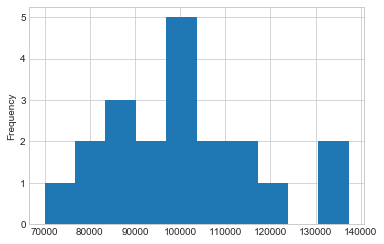

In [12]:
df['ext price'].plot(kind='hist')

In [14]:
df['ext price'].describe()

count        20.000000
mean     100939.216000
std       17675.097485
min       70004.360000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      137351.960000
Name: ext price, dtype: float64

In [15]:
pd.qcut(df['ext price'], q=4)

0       (70004.359, 89137.708]
1      (89137.708, 100271.535]
2       (70004.359, 89137.708]
3      (110132.552, 137351.96]
4      (89137.708, 100271.535]
5      (89137.708, 100271.535]
6       (70004.359, 89137.708]
7     (100271.535, 110132.552]
8      (110132.552, 137351.96]
9      (110132.552, 137351.96]
10     (89137.708, 100271.535]
11      (70004.359, 89137.708]
12      (70004.359, 89137.708]
13     (89137.708, 100271.535]
14    (100271.535, 110132.552]
15     (110132.552, 137351.96]
16    (100271.535, 110132.552]
17     (110132.552, 137351.96]
18    (100271.535, 110132.552]
19    (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(70004.359, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 137351.96]]

In [16]:
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4)
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)

df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


In [17]:
df['quantile_ex_1'].value_counts()

(110132.552, 137351.96]     5
(100271.535, 110132.552]    5
(89137.708, 100271.535]     5
(70004.359, 89137.708]      5
Name: quantile_ex_1, dtype: int64

In [18]:
df['quantile_ex_2'].value_counts()

(124627.0, 137352.0]    2
(112290.0, 124627.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(82368.0, 87168.0]      2
(70003.0, 82368.0]      2
Name: quantile_ex_2, dtype: int64

In [19]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [20]:
df['quantile_ex_3'].value_counts()

Diamond     4
Platinum    4
Gold        4
Silver      4
Bronze      4
Name: quantile_ex_3, dtype: int64

In [21]:
results, bin_edges = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])

In [22]:
df.describe(include='category')

,quantile_ex_1,quantile_ex_2,quantile_ex_3
count,20,20,20
unique,4,10,5
top,"(110132.552, 137351.96]","(124627.0, 137352.0]",Diamond
freq,5,2,4


In [23]:
df['quantile_ex_4'] = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3,quantile_ex_4
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]",Bronze,0
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold,2
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]",Bronze,0
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]",Diamond,4
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver,1


In [24]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3', 'quantile_ex_4'])

In [25]:
df

,account number,name,ext price
0,141962,Herman LLC,82865.00
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92
5,257198,"Cronin, Oberbrunner and Spencer",89734.55
6,307599,"Kassulke, Ondricka and Metz",86451.07
7,383080,Will LLC,104437.60
8,412290,Jerde-Hilpert,112591.43
9,424914,White-Trantow,135841.99


In [26]:
pd.cut(df['ext price'], bins=4)

0      (69937.012, 86841.26]
1      (86841.26, 103678.16]
2      (69937.012, 86841.26]
3     (120515.06, 137351.96]
4      (86841.26, 103678.16]
5      (86841.26, 103678.16]
6      (69937.012, 86841.26]
7     (103678.16, 120515.06]
8     (103678.16, 120515.06]
9     (120515.06, 137351.96]
10     (86841.26, 103678.16]
11     (69937.012, 86841.26]
12     (86841.26, 103678.16]
13     (86841.26, 103678.16]
14     (86841.26, 103678.16]
15    (120515.06, 137351.96]
16     (86841.26, 103678.16]
17    (103678.16, 120515.06]
18    (103678.16, 120515.06]
19     (86841.26, 103678.16]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(69937.012, 86841.26] < (86841.26, 103678.16] < (103678.16, 120515.06] < (120515.06, 137351.96]]

In [27]:
pd.cut(df['ext price'], bins=4).value_counts()

(86841.26, 103678.16]     9
(103678.16, 120515.06]    4
(69937.012, 86841.26]     4
(120515.06, 137351.96]    3
Name: ext price, dtype: int64

In [28]:
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 70000, 100000, 130000, 200000]
df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

In [29]:
df

,account number,name,ext price,cut_ex1
0,141962,Herman LLC,82865.00,gold
1,146832,Kiehn-Spinka,99608.77,gold
2,163416,Purdy-Kunde,77898.21,gold
3,218895,Kulas Inc,137351.96,diamond
4,239344,Stokes LLC,91535.92,gold
5,257198,"Cronin, Oberbrunner and Spencer",89734.55,gold
6,307599,"Kassulke, Ondricka and Metz",86451.07,gold
7,383080,Will LLC,104437.60,platinum
8,412290,Jerde-Hilpert,112591.43,platinum
9,424914,White-Trantow,135841.99,diamond


In [30]:
pd.cut(df['ext price'], bins=np.linspace(0, 200000, 9))

0      (75000.0, 100000.0]
1      (75000.0, 100000.0]
2      (75000.0, 100000.0]
3     (125000.0, 150000.0]
4      (75000.0, 100000.0]
5      (75000.0, 100000.0]
6      (75000.0, 100000.0]
7     (100000.0, 125000.0]
8     (100000.0, 125000.0]
9     (125000.0, 150000.0]
10     (75000.0, 100000.0]
11      (50000.0, 75000.0]
12     (75000.0, 100000.0]
13     (75000.0, 100000.0]
14    (100000.0, 125000.0]
15    (100000.0, 125000.0]
16    (100000.0, 125000.0]
17    (100000.0, 125000.0]
18    (100000.0, 125000.0]
19    (100000.0, 125000.0]
Name: ext price, dtype: category
Categories (8, interval[float64]): [(0.0, 25000.0] < (25000.0, 50000.0] < (50000.0, 75000.0] < (75000.0, 100000.0] < (100000.0, 125000.0] < (125000.0, 150000.0] < (150000.0, 175000.0] < (175000.0, 200000.0]]